                                                                  Libraries

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import joblib


                                                                           Data

In [4]:
full_train=pd.read_csv(r"f:\PROJECTS\CybersecurityProjects\Phishing Project\phishing+websites\final_data_phishing.csv")
valid=pd.read_csv(r"f:\PROJECTS\CybersecurityProjects\Phishing Project\phishing+websites\final_data_old.csv")

                                                         Data Columns

In [5]:

print(full_train.columns)
print(full_train.shape)
print("_____________________________________________________")
print(valid.shape)
print(valid.columns)

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')
(11055, 31)
_____________________________________________________
(2456, 31)
Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 

                                                  Missing Values

In [6]:
print(pd.isna(full_train).any())

having_IP_Address              False
URL_Length                     False
Shortining_Service             False
having_At_Symbol               False
double_slash_redirecting       False
Prefix_Suffix                  False
having_Sub_Domain              False
SSLfinal_State                 False
Domain_registeration_length    False
Favicon                        False
port                           False
HTTPS_token                    False
Request_URL                    False
URL_of_Anchor                  False
Links_in_tags                  False
SFH                            False
Submitting_to_email            False
Abnormal_URL                   False
Redirect                       False
on_mouseover                   False
RightClick                     False
popUpWidnow                    False
Iframe                         False
age_of_domain                  False
DNSRecord                      False
web_traffic                    False
Page_Rank                      False
G

In [7]:
print(pd.isna(valid).any())

having_IP_Address              False
URL_Length                     False
Shortining_Service             False
having_At_Symbol               False
double_slash_redirecting       False
Prefix_Suffix                  False
having_Sub_Domain              False
SSLfinal_State                 False
Domain_registeration_length    False
Favicon                        False
port                           False
HTTPS_token                    False
Request_URL                    False
URL_of_Anchor                  False
Links_in_tags                  False
SFH                            False
Submitting_to_email            False
Abnormal_URL                   False
Redirect                       False
on_mouseover                   False
RightClick                     False
popUpWidnow                    False
Iframe                         False
age_of_domain                  False
DNSRecord                      False
web_traffic                    False
Page_Rank                      False
G

                                                                 Data Preparation

In [8]:
trainY=full_train.iloc[:,-1]

In [9]:
trainX=full_train.drop(['Result'],axis=1)

In [10]:
x_train,x_test,y_train,y_test=train_test_split(trainX,trainY,test_size=0.2,random_state=42)

                                                                 
                                                                Random Forest Model

In [11]:
random=RandomForestClassifier(n_estimators=100,random_state=0,criterion='entropy')

In [12]:
model=random.fit(x_train,y_train)

In [13]:
prediction=model.predict(x_test)

In [14]:
accuracy=accuracy_score(y_test,prediction)
print(accuracy)

0.9678878335594754


                                                                       Features Importance

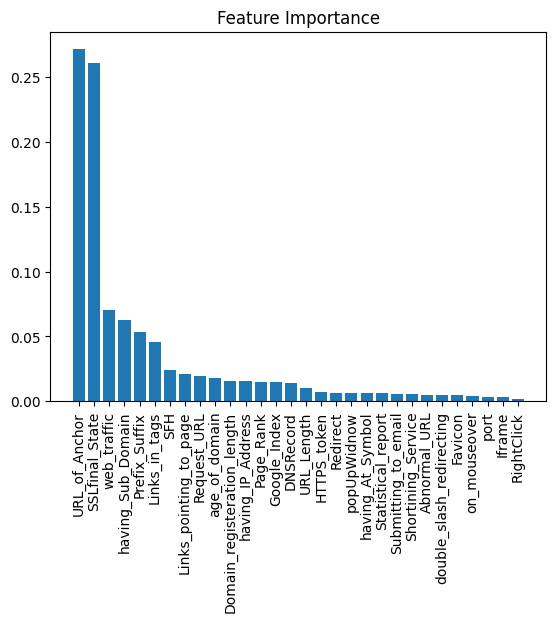

In [15]:
imporatnce=model.feature_importances_
#order the features
indices=np.argsort(imporatnce)[::-1]
#rearrange the features
names=[trainX.columns[i] for i in indices]
#plot the features
plt.figure()
plt.title("Feature Importance")
plt.bar(range(trainX.shape[1]),imporatnce[indices])

plt.xticks(range(trainX.shape[1]),names,rotation=90)
plt.show()



In [16]:
# Save the trained model to a file
model_filename = r'f:\PROJECTS\CybersecurityProjects\Phishing Project\phishing+websites\code\First_Version.joblib'
joblib.dump(model, model_filename)

['f:\\PROJECTS\\CybersecurityProjects\\Phishing Project\\phishing+websites\\code\\First_Version.joblib']